<a href="https://www.aus.edu/"><img src="https://i.imgur.com/pdZvnSD.png" width=200> </a>

<h1 align=center><font size = 5>Logistic Regression</font>
<h1 align=center><font size = 5>Prepared by Alex Aklson, Ph.D.</font>
<h1 align=center><font size = 5>October 03, 2024</font>

#### Import Libraries

As always, let's start by importing the libaries and packages that we will be using.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

#### Read in Datasets

Read in the training and test datasets.

In [2]:
train_df = pd.read_csv('training_data.csv')
test_df = pd.read_csv('test_data.csv')

Check out the training dataset by displaying the first five datapoints.

In [3]:
train_df.head()

,feature_1,feature_2,target
0,1.288951,-0.524080,1
1,-0.905316,0.155444,0
2,0.882096,0.920059,0
3,1.980711,0.348378,1
4,0.542652,0.550213,0


And check out the dimension of the training dataset.

In [4]:
train_df.shape

(350, 3)

Do the same for the test set.

In [5]:
test_df.head()

,feature_1,feature_2,target
0,0.380177,0.142964,1
1,0.193159,0.398784,1
2,0.216360,0.300315,1
3,1.135471,-0.555398,1
4,0.441942,-0.375001,1


In [6]:
test_df.shape

(150, 3)

#### Prepare Data for Modelling

Separate features and target into different variables.

In [7]:
X_train = train_df[["feature_1", "feature_2"]]
y_train = train_df["target"]

In [8]:
X_test = test_df[["feature_1", "feature_2"]]
y_test = test_df["target"]

#### Visualize the Data

Let's plot a scatter plot of the training dataset.

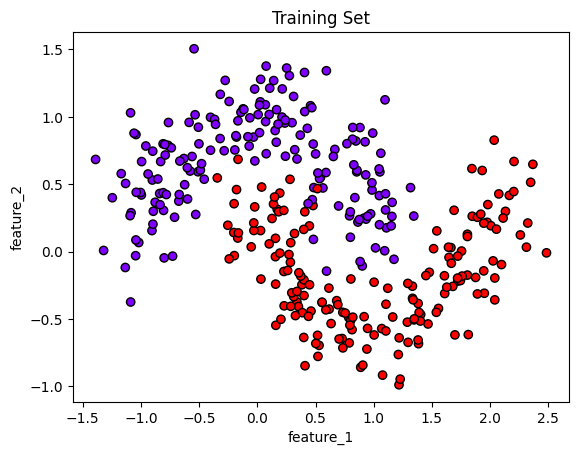

In [9]:
plt.scatter(X_train["feature_1"], X_train["feature_2"], c=y_train, cmap='rainbow', edgecolor='k')
plt.title("Training Set")
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.show()

#### Plot a scatter plot of the test set.

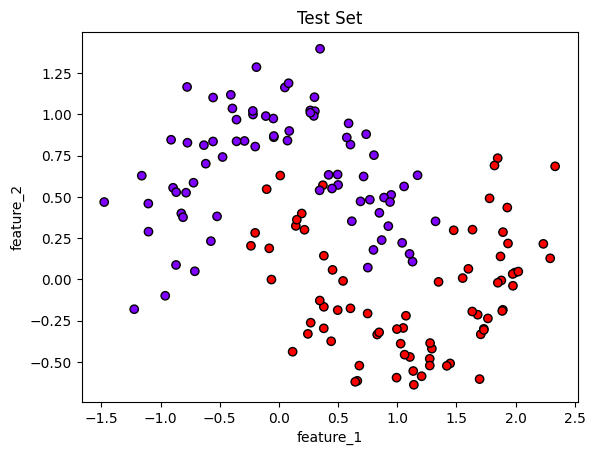

In [13]:
plt.scatter(X_test["feature_1"], X_test["feature_2"], c=y_test, cmap='rainbow', edgecolor='k')
plt.title("Test Set")
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.show()

#### Modelling

We start by instantiating a LogisticRegression object with penalty=None.

In [14]:
model = LogisticRegression(penalty=None, max_iter=10000)

Then we fit the model on the training data.

In [15]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, penalty=None)

Gradient Descent was used to find the weight parameters that define our logistic regression hypothesis. Remember that our hypothesis is given by:

$$
\displaystyle h_w(x) = \frac{1}{1 + e^{-(w_0 + w_1x_1 + w_2x_2 + \dots + w_nx_n)}}
$$

In this case, we only have two features, so our hypothesis is:

$$
\displaystyle h_w(x) = \frac{1}{1 + e^{-(w_0 + w_1x_1 + w_2x_2)}}
$$

Let's get the estimated weights.

In [16]:
model.coef_

array([[ 1.23635096, -4.88283383]])

$w_1$ = 1.236 and $w_2$ = -4.883.

In [17]:
w_1 = model.coef_[0][0]
w_2 = model.coef_[0][1]

In [18]:
print(w_1, w_2)

1.2363509641804673 -4.882833829838996


In [19]:
model.intercept_

array([0.58520034])

$w_0$ = 0.585.

In [20]:
w_0 = model.intercept_[0]

In [21]:
print(w_0)

0.5852003434164756


#### Question: What is the label of point (0.5, -0.5) using the estimated parameters?

In [ ]:
### Use this cell to answer the question




Now, let's apply our model to the test set. Remember that the hypothesis outputs the probability that each datapoint's label is $y = 1$.

In [22]:
test_set_probabilities = model.predict_proba(X_test)

Let's take a look at the first probabilities.

In [23]:
test_set_probabilities[:5, :]

array([[0.41164606, 0.58835394],
       [0.75457893, 0.24542107],
       [0.64878242, 0.35121758],
       [0.00900474, 0.99099526],
       [0.04914143, 0.95085857]])

In [24]:
test_df['hypothesis_probability'] = test_set_probabilities[:, 1]

In [25]:
test_df.head()

,feature_1,feature_2,target,hypothesis_probability
0,0.380177,0.142964,1,0.588354
1,0.193159,0.398784,1,0.245421
2,0.216360,0.300315,1,0.351218
3,1.135471,-0.555398,1,0.990995
4,0.441942,-0.375001,1,0.950859


Let's define a function to plot the decision boundary

In [26]:
def plot_decision_boundary(model, X, y, resolution=500):
    x_min, x_max = X["feature_1"].min() - 0.1, X["feature_1"].max() + 0.1
    y_min, y_max = X["feature_2"].min() - 0.1, X["feature_2"].max() + 0.1
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution), np.linspace(y_min, y_max, resolution))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_df = pd.DataFrame(grid_points, columns=["feature_1", "feature_2"])
    
    Z = model.predict(grid_df)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='rainbow')
    plt.contour(xx, yy, Z, colors='k', linewidths=2)
    plt.scatter(X["feature_1"], X["feature_2"], c=y, s=20, edgecolor='k', cmap='rainbow')
    plt.title("Decision Boundary")
    plt.show()

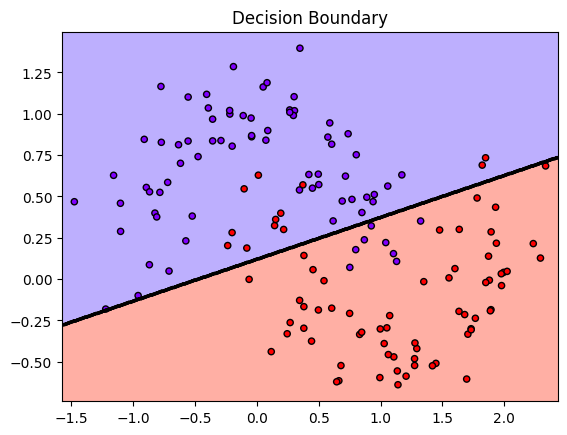

In [27]:
plot_decision_boundary(model, X_test, y_test)

Let's get the class labels.

In [28]:
test_labels = model.predict(X_test)

Let's add them to the test data.

In [29]:
test_df['predicted_labels'] = test_labels

In [30]:
test_df.head()

,feature_1,feature_2,target,hypothesis_probability,predicted_labels
0,0.380177,0.142964,1,0.588354,1
1,0.193159,0.398784,1,0.245421,0
2,0.216360,0.300315,1,0.351218,0
3,1.135471,-0.555398,1,0.990995,1
4,0.441942,-0.375001,1,0.950859,1


Let's calculate the test cost, which is defined as:

$$
\displaystyle J(w) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_w(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_w(x^{(i)})) \right]
$$

In [31]:
test_loss = log_loss(y_test, model.predict_proba(X_test))

In [32]:
print(test_loss)

0.27803048963166704


#### Question: Can you calculate the training cost?

In [35]:
train_loss = log_loss(y_train, model.predict_proba(X_train))
train_loss

0.2807140596961386

#### Print the training cost and compare it to the test cost. Which one is lower?

In [36]:
### Add your answer here
print (train_loss)





0.2807140596961386


#### Engineer More Features

In [37]:
degree = 1

Instantiate a polynomial feature generator instance.

In [38]:
features_generator = PolynomialFeatures(degree, include_bias=False)

Generate Additional Features for the Defined Degree.

In [39]:
X_poly_train = features_generator.fit_transform(X_train)
X_poly_test = features_generator.transform(X_test)

Get the names of the generated features and view the resulting data as a pandas dataframe.

In [40]:
column_names = features_generator.get_feature_names_out(input_features=X_train.columns)
polynomial_features_df = pd.DataFrame(X_poly_train, columns=column_names)

In [41]:
polynomial_features_df.head()

,feature_1,feature_2
0,1.288951,-0.524080
1,-0.905316,0.155444
2,0.882096,0.920059
3,1.980711,0.348378
4,0.542652,0.550213


#### For the new datasets, can you build a logistic regression model and calculate the training and the test costs?

(Use the following cells to do that)

In [ ]:
### Instantiate a Logistic Regression Instance
model = Logisticregression



In [ ]:
### Fit it on the new training data
model.fit(X_poly_train,y_train)



In [ ]:
### Calculate the training and test costs, print them, and compare them. Any noticable difference compared to the previous costs?




Let's update our function to plot the decision boundary to include additional polynomial features.

In [42]:
def plot_decision_boundary_polynomial(model, X, y, features_generator, resolution=500):
    x_min, x_max = X["feature_1"].min() - 0.1, X["feature_1"].max() + 0.1
    y_min, y_max = X["feature_2"].min() - 0.1, X["feature_2"].max() + 0.1
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution), np.linspace(y_min, y_max, resolution))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_df = pd.DataFrame(grid_points, columns=["feature_1", "feature_2"])
    
    grid_poly = features_generator.transform(grid_df)
    
    Z = model.predict(grid_poly)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='rainbow')
    plt.contour(xx, yy, Z, colors='k', linewidths=2)
    plt.scatter(X["feature_1"], X["feature_2"], c=y, s=20, edgecolor='k', cmap='rainbow')
    plt.title("Decision Boundary with Polynomial Features")
    plt.show()

Now, let's plot the new decision boundary.

In [ ]:
plot_decision_boundary_polynomial(model, X_test, y_test, features_generator)

#### Repeat the process for Degrees 2, 3, 5, and 7.

##### Start with Degree 2.

In [45]:
### Set degree to 2
degree = 2


In [46]:
### Instantiate a PolynomialFeatures instance
features_generator = PolynomialFeatures(degree, include_bias=False)


In [44]:
### Fit it on the training data
X_poly_train = features_generator.fit_transform(X_train)
X_poly_test = features_generator.transform(X_test)


In [43]:
### Transform the test data
column_names = features_generator.get_feature_names_out(input_features=X_train.columns)
polynomial_features_df = pd.DataFrame(X_poly_train, columns=column_names)
polynomial_features_df.head()

,feature_1,feature_2
0,1.288951,-0.524080
1,-0.905316,0.155444
2,0.882096,0.920059
3,1.980711,0.348378
4,0.542652,0.550213


In [ ]:
### Instantiate a Logistic Regression Instance



In [ ]:
### Fit it on the new training data



In [ ]:
### Calculate the training and test costs, print them, and compare them. How do they compare to the costs of degree 2?




In [ ]:
### Repeat for Degrees 3, 5, and 7.


In [ ]:
degree = 3


In [ ]:
degree = 5

In [ ]:
degree = 7

In [47]:
def fit_and_plot_polynomial_logistic(X_train, X_test, y_train, y_test, degree):

    # generate polynomial features
    features_generator = PolynomialFeatures(degree)
    X_poly_train = features_generator.fit_transform(X_train)
    X_poly_test = features_generator.transform(X_test)

    # fit a logistic regression model
    model = LogisticRegression(penalty=None, max_iter=10000)
    model.fit(X_poly_train, y_train)

    # plot the decision boundary for training and test data
    plot_decision_boundary_polynomial(model, X_train, y_train, features_generator)
    plot_decision_boundary_polynomial(model, X_test, y_test, features_generator)
    
    # calculate training and test cost
    train_loss = log_loss(y_train, model.predict_proba(X_poly_train))
    test_loss = log_loss(y_test, model.predict_proba(X_poly_test))
    
    return train_loss, test_loss

Loop through polynomial degrees and evaluate performance.

Fitting polynomial degree 1


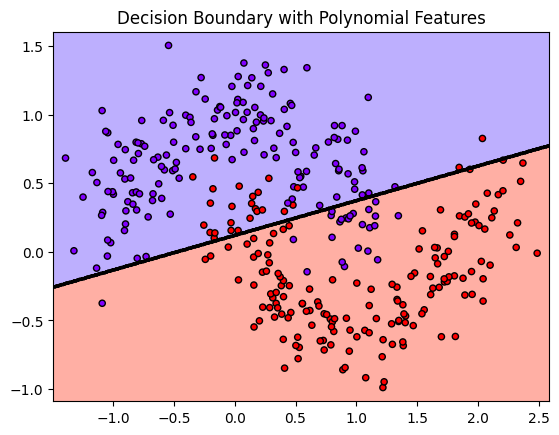

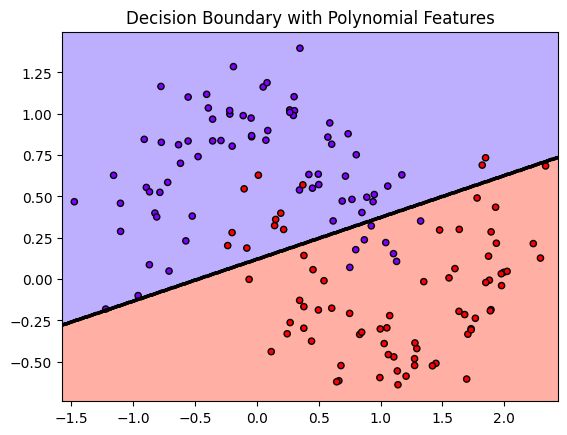

Fitting polynomial degree 3


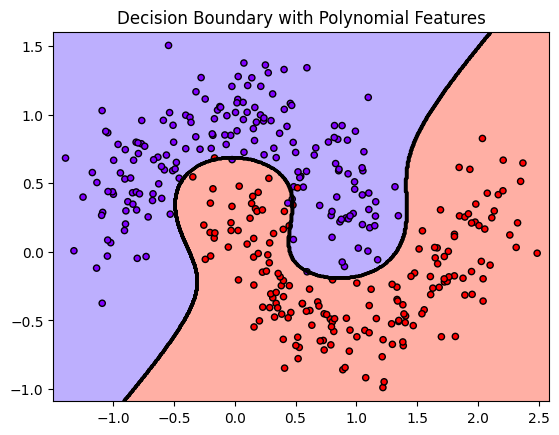

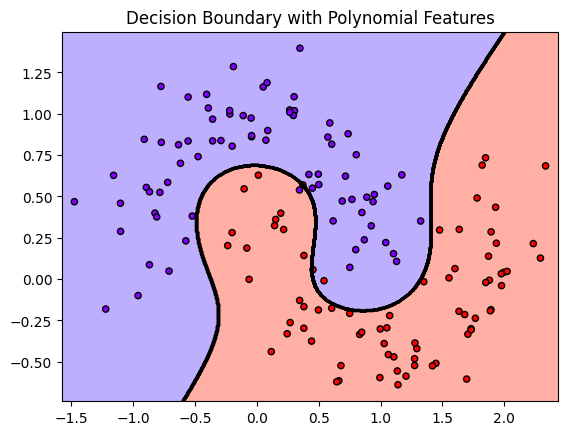

Fitting polynomial degree 5


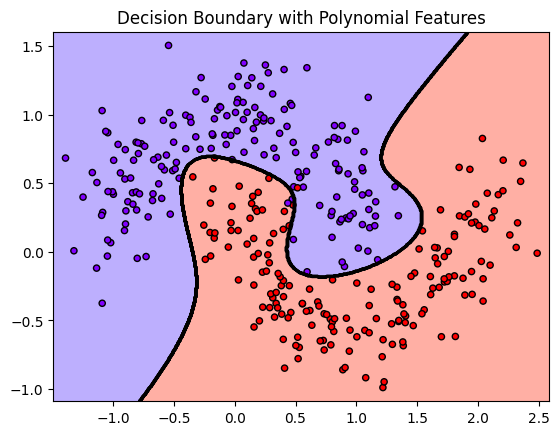

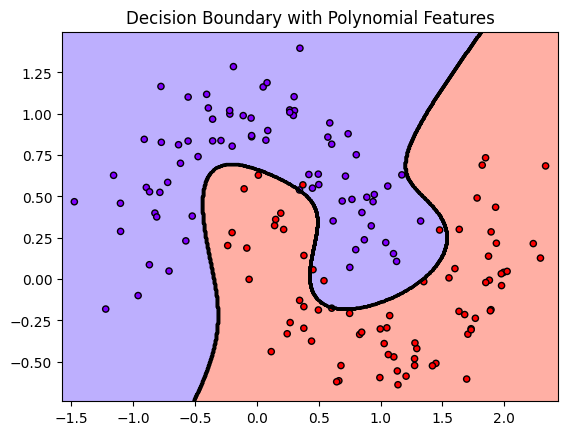

Fitting polynomial degree 7


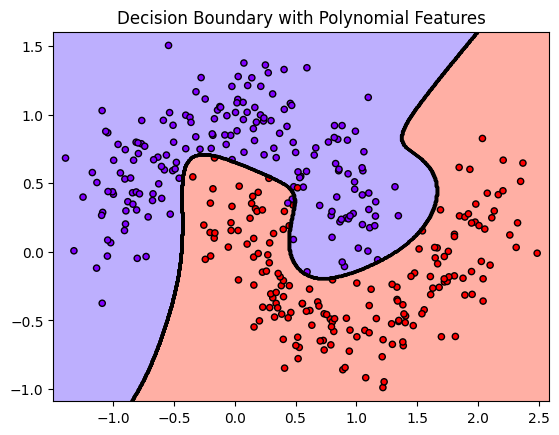

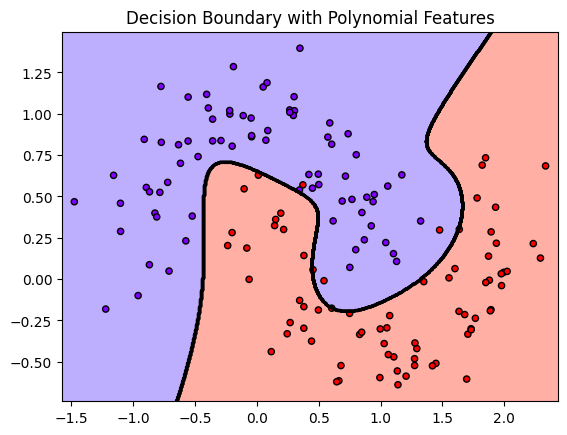

In [48]:
degrees = [1, 3, 5, 7]
train_losses = []
test_losses = []

for degree in degrees:
    print("Fitting polynomial degree {}".format(degree))
    train_loss, test_loss = fit_and_plot_polynomial_logistic(X_train, X_test, y_train, y_test, degree)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

Plot training and test loss as a function of polynomial degree.

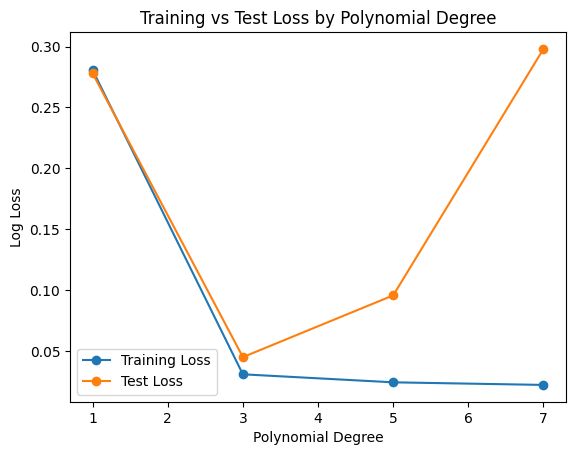

In [49]:
plt.plot(degrees, train_losses, label="Training Loss", marker='o')
plt.plot(degrees, test_losses, label="Test Loss", marker='o')
plt.xlabel("Polynomial Degree")
plt.ylabel("Log Loss")
plt.title("Training vs Test Loss by Polynomial Degree")
plt.legend()
plt.show()